# Marcela Personalizados: Análise de engajamento
**LINK:** https://www.instagram.com/marcela_personalizados/

## Scraping de dados (Links, tipo, data, curtidas, comentários)

In [ ]:
# Bibliotecas , configurações iniciais
import pandas as pd
import pyautogui as pag
import pyperclip
from time import sleep
link_list = []

In [ ]:
# Posição
pag.position()

In [ ]:
# Função de copiar para a lista
def funcao_links():
    sleep(0.5)
    pag.press('down')
    pag.press('down')
    pag.press('down')
    pag.press('down')
    pag.press('down')
    pag.press('enter')
    sleep(0.5)
    
    clipboard = pyperclip.paste()
    link_list.append(clipboard)

In [ ]:
# Coleta de Links
pag.click(x=151, y=18)
sleep(1)

for i in range(56):
    sleep(0.5)
    pag.rightClick(x=373, y=215)
    funcao_links()

    sleep(0.5)
    pag.rightClick(x=618, y=211)
    funcao_links()

    sleep(0.5)
    pag.rightClick(x=877, y=216)
    funcao_links()
    
    pag.scroll(-300)

# Mostrar lista coletada
for i in link_list:
    print(i)

<font color="blue">✅ Arquivo completo → link_list.txt</font>

In [ ]:
# Atualizando variável link_list com txt
with open('link_list.txt', 'r', encoding='utf-8') as arquivo:
    link_list = arquivo.readlines()  # Cada linha será um item da lista

In [ ]:
# Removendo quebras de linha extras
link_list = [linha.strip() for linha in link_list]

In [ ]:
# Separando as palavras de cada Link
frase_link = [frase.split('/') for frase in link_list]

In [ ]:
# Criando lista de tipos
tipos = []
for i in range(166):
    if frase_link[i][-3] == "reel":
        tipos.append("Reels")
    else:
        tipos.append("Outros")

for i in tipos:
    print(i)

In [ ]:
import instaloader
import pandas as pd
dados = []

# Inicializar o Instaloader
loader = instaloader.Instaloader()

# Fazer login
usuario = "iesus.me"
senha = "YES.me@"
loader.login(usuario, senha)

# Iterar pelas URLs das postagens
for post_url in link_list:
    # Extrair o shortcode da URL
    shortcode = post_url.split("/")[-2]
    
    # Carregar os dados do post
    post = instaloader.Post.from_shortcode(loader.context, shortcode)
    
    # Coletar informações relevantes
    data_postagem = post.date_utc.strftime('%Y-%m-%d %H:%M:%S')  # Data em formato UTC
    numero_curtidas = post.likes
    numero_comentarios = post.comments
    
    # Adicionar os dados à lista
    dados.append({
        "Data da Postagem": data_postagem,
        "Número de Curtidas": numero_curtidas,
        "Número de Comentários": numero_comentarios
    })

# Criar um DataFrame com os dados
df = pd.DataFrame(dados)

# Exportar para um arquivo CSV
df.to_csv("dados_instagram.csv", index=False)

print("Dados exportados com sucesso para 'dados_instagram.csv'")

In [5]:
base.describe()

,Data,Curtidas,Comentários
count,166,166.000000,166.000000
mean,2022-05-31 01:52:46.265060352,14.174699,2.072289
min,2019-01-09 00:00:00,1.000000,0.000000
25%,2021-07-21 00:00:00,8.000000,0.000000
50%,2022-03-23 12:00:00,11.500000,1.000000
75%,2023-07-12 00:00:00,16.000000,2.000000
max,2024-12-01 00:00:00,111.000000,46.000000
std,NaN,12.124589,4.542815


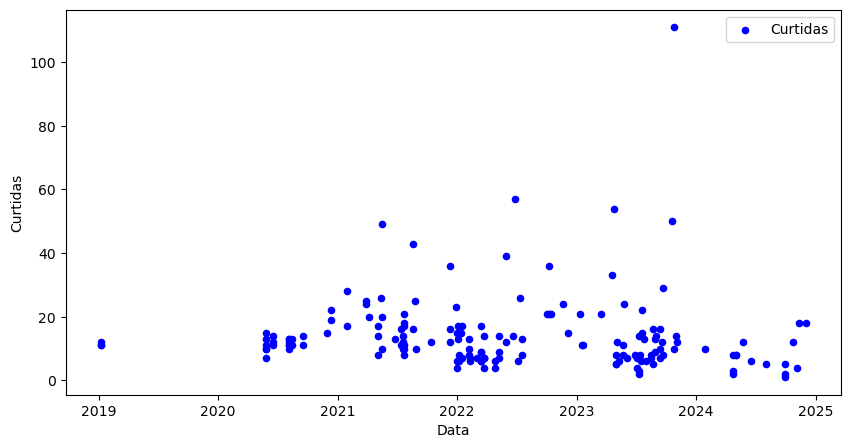

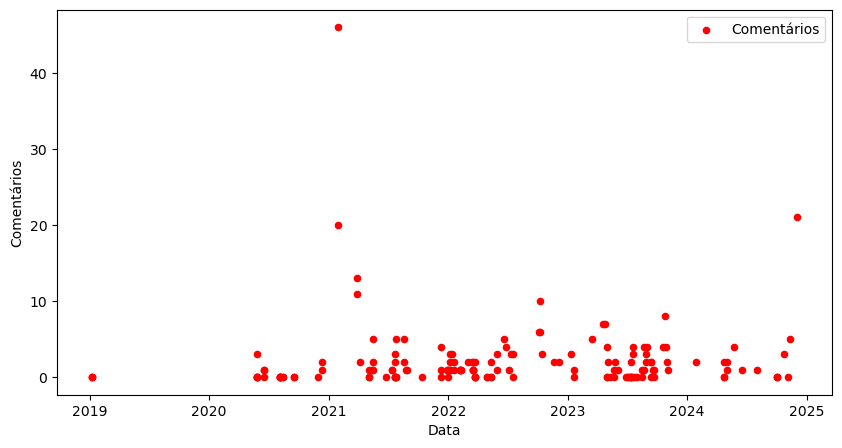

In [83]:
base.plot(kind="scatter",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(10,5));
base.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(10,5));

## Análise exploratória

In [17]:
import pandas as pd
base=pd.read_excel('base_dados.xlsx')

In [ ]:
#Extraindo os 5 melhores
top5 = base.sort_values(by="Curtidas",ascending=False).head()
top5.to_csv('top5.csv')

In [ ]:
#Extraindo os 5 piores
worst5 = base.sort_values(by="Curtidas",ascending=False).tail()
worst5.to_csv('worst5.csv')

In [19]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [25]:
base.groupby('Tags')[['Curtidas', 'Comentários']].mean().sort_values("Curtidas", ascending=False)

,Curtidas,Comentários
Tags,,
Pessoa exibindo produto,43.00,5.00
Produção,40.17,3.67
Parcerias,18.00,21.00
Foto estética,14.59,2.00
Exposição,14.55,2.85
Caseiro,12.13,1.65
Design,5.00,0.00


# 🔍 Perguntas

### <font color="gray">1. Qual a média geral de curtidas?</font>
**<font color="blue">R:</font>** Média = **14 likes/post**

### <font color="gray">2. Qual foi o período de maior atividade (postagens)?</font>
**<font color="blue">R:</font>** Final de **Março de 2022** foi o período mais ativo do usuário (**mediana: 23/03/2022**)**

### <font color="gray">3. Qual foi o período de maior engajamento?</font>
**<font color="blue">R:</font>** Meiados de **Março de 2022** foi o período com maior **engajamento** (**mediana: 16/03/2022**)**

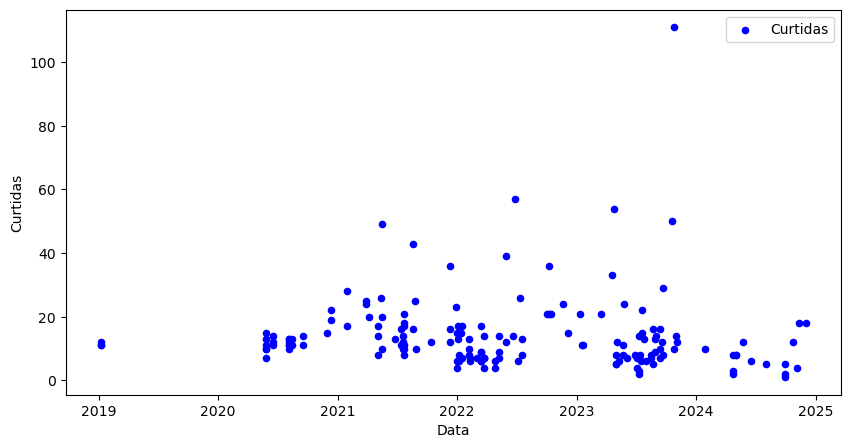

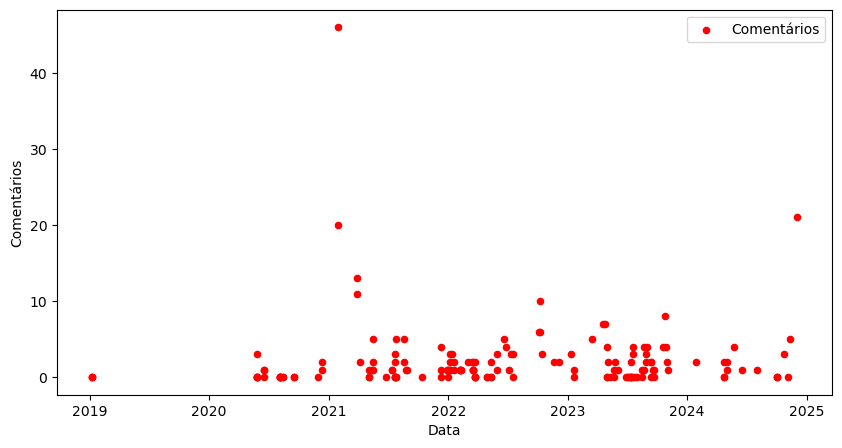

In [107]:
base.plot(kind="scatter",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(10,5));
base.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(10,5));

### <font color="gray">4. Quais os 5 posts com MAIS curtidas e qual o padrão observado?</font> <font color="green">[+]</font>
1. https://www.instagram.com/marcela_personalizados/reel/Cy1fy7UPyDn/
2. https://www.instagram.com/marcela_personalizados/reel/CfSXO5TJ7C9/
3. https://www.instagram.com/marcela_personalizados/p/Crb0uEMPPxP/
4. https://www.instagram.com/marcela_personalizados/reel/CyowyxYvBYT/
5. https://www.instagram.com/marcela_personalizados/p/CO5ZR8gDdwQ/

1. Jovem exibindo processo de produção, música empolgante, cores vibrantes.
2. Exibição de produto bordado, música 'cute'.
3. Pacote conjunto de produtos, produto bem embalado, fotografia estética, cores combinando com fundo.
4. Processo de produção
5. Fotografia estética, produto conjunto, fundo harmoniza com cores do produto.

### <font color="gray">5. Quais os 5 posts com MENOS curtidas e qual o padrão observado?</font> <font color="red">[-]</font>
1. https://www.instagram.com/marcela_personalizados/p/CunNl1EvbFY/
2. https://www.instagram.com/marcela_personalizados/p/DAja4k6vZHa/
3. https://www.instagram.com/marcela_personalizados/p/C6KMsjAPY75/
4. https://www.instagram.com/marcela_personalizados/p/CumZBryOYcc/
5. https://www.instagram.com/marcela_personalizados/p/DAjbI15PkR5/

1. A má iluminação faz o produto aparentar estar 'sujo', apesar de não estar.
2. Iluminação deficiente, escurecendo o contraste entre o rosa e o branco do produto.
3. Muita saturação de informação. Não dá pra entender realmente a mensagem do produto.
4. Confuso aos olhos do espectador, Excessivamente caseiro.
5. Iluminação deficiente, produtos mal organizados. Parecem ter sido 'jogados'.

### <font color="gray">6. Qual foi a melhor frequência de postagem do negócio?</font>
* 2022: ~4,58 postagens/mês
* 2021: ~3,33 postagens/mês
* 2023: ~3,17 postagens/mês


### <font color="gray">7. Qual tipo de conteúdo mais engajou curtidas e comentários?</font>

**Tipo**
* Média Reels = 20,43 
* Média Carrossel = 16,77
* Média Foto = 11,45

**Tags**<br>
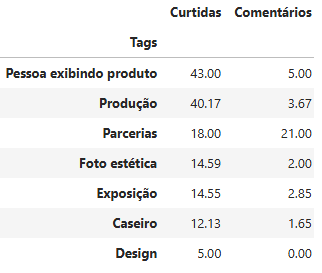

# ✅ Conclusões

### 1. **ATIVIDADE** é um fator de importância para o usuário
O período de maior **ENGAJAMENTO** corresponde ao período de maior **ATIVIDADE** do usuário.

### 2. Há um padrão de HORÁRIO que mais funciona com a audiência do usuário
O horário de maior **ENGAJAMENTO** está na faixa média de 17h30 às 21h00 ~
* 17:22
* 20:34 → Melhor 🏆
* 21:06

### 3. Reels + Pessoas + Processo de Produção + Música empolgado = **Engajamento**
É algo que, estatísticamente, funciona muito com a audiência e é pouco explorado pelo usuário.
No geral, pessoas se interessam por conteúdos humanizados e processos criativos. Isso retém o view até o final e garante o engajamento. A captação dos processos de produção é uma **grande oportunidade** para o usuário. Veja tabela da média de curtidas e comentários por classe:<br>
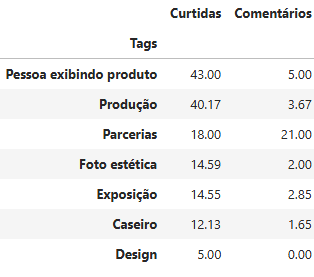
* Exemplo 1: https://www.instagram.com/marcela_personalizados/reel/Cy1fy7UPyDn/
* Exemplo 2: https://www.instagram.com/marcela_personalizados/reel/CyowyxYvBYT/

### 4. Design não funciona para o usuário
Os posts com estrutura de Design pertence a classe dos posts com <font color="red">pior engajamento</font>. É interessante notar que o público tende a responder bem às postagens harmônicas e humanas. Fica a sugestão para o usuário abolir os posts Design do escopo de postagens; exigem tempo e são indiferentes à audiência.

* Exemplo 1: https://www.instagram.com/marcela_personalizados/p/CrwjthvPYxJ/
* Exemplo 2: https://www.instagram.com/marcela_personalizados/p/CrwjV_3vAv8/

### 5. Atenção à **iluminação** e à **organização** dos produtos para fotografia
É algo que, estatísticamente, o usuário tem apresentado <font color="red">inaptidão</font>. Os principais conteúdos que não engajaram apresentam estas características.
* Exemplo 1: https://www.instagram.com/marcela_personalizados/p/DAjbI15PkR5/
* Exemplo 2: https://www.instagram.com/marcela_personalizados/p/CumZBryOYcc/

### 6. Parcerias = Comentários
É importante notar a correlação lógica das parcerias com o aumento de comentários. Os posts de parcerias aparecem no feed de ambos os envolvidos, logo é uma estratégia interessante para trazer novos seguidores e potenciais clientes!<br>
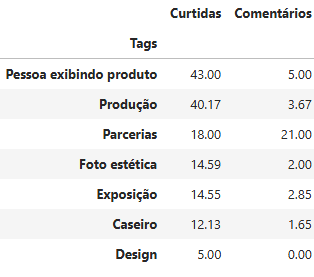


### 7. Sobre frequência de postagens
A média de ~4,58 postagens por mês (cerca de uma por semana) é considerada adequada para muitos pequenos e médios negócios. Essa frequência é suficiente para manter a presença online sem saturar o público.
* 3-5 postagens por semana (12-20 postagens/mês) é comum para redes sociais ativas, especialmente em plataformas como Instagram ou Facebook.
* 1-2 postagens por semana (~4-8 postagens/mês) funciona para negócios com menos tempo ou orçamento.
